# Convolution Animation

Text(0.5, 1.0, 'Kernel')

Text(0, 0, '0')

Text(1, 0, '0')

Text(2, 0, '0')

Text(3, 0, '0')

Text(4, 0, '0')

Text(5, 0, '0')

Text(6, 0, '0')

Text(0, 1, '0')

Text(1, 1, '147')

Text(2, 1, '135')

Text(3, 1, '146')

Text(4, 1, '142')

Text(5, 1, '91')

Text(6, 1, '0')

Text(0, 2, '0')

Text(1, 2, '102')

Text(2, 2, '146')

Text(3, 2, '105')

Text(4, 2, '99')

Text(5, 2, '124')

Text(6, 2, '0')

Text(0, 3, '0')

Text(1, 3, '90')

Text(2, 3, '116')

Text(3, 3, '69')

Text(4, 3, '93')

Text(5, 3, '59')

Text(6, 3, '0')

Text(0, 4, '0')

Text(1, 4, '59')

Text(2, 4, '111')

Text(3, 4, '80')

Text(4, 4, '67')

Text(5, 4, '72')

Text(6, 4, '0')

Text(0, 5, '0')

Text(1, 5, '96')

Text(2, 5, '123')

Text(3, 5, '55')

Text(4, 5, '130')

Text(5, 5, '73')

Text(6, 5, '0')

Text(0, 6, '0')

Text(1, 6, '0')

Text(2, 6, '0')

Text(3, 6, '0')

Text(4, 6, '0')

Text(5, 6, '0')

Text(6, 6, '0')

Text(0, 0, '1')

Text(1, 0, '1')

Text(2, 0, '1')

Text(0, 1, '1')

Text(1, 1, '1')

Text(2, 1, '1')

Text(0, 2, '1')

Text(1, 2, '1')

Text(2, 2, '1')

/tmp/ipykernel_14522/710030080.py:82: UserWarning: frames=<zip object at 0x7f610a3d2380> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init,


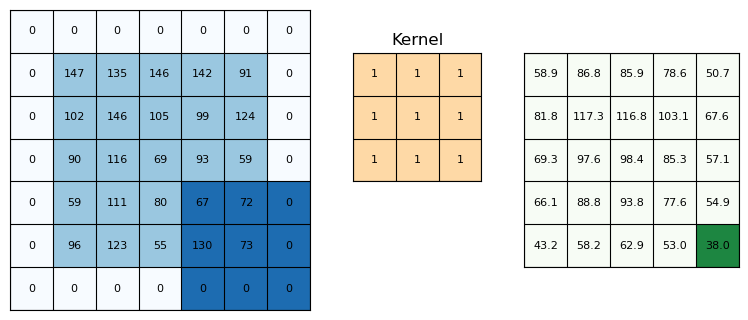

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.animation
#####################
# Array preparation
#####################
#input array
a = np.random.randint(50,150, size=(5,5))
# kernel
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
normalizing_constant = kernel.size
# visualization array (2 bigger in each direction)
va = np.zeros((a.shape[0]+2, a.shape[1]+2), dtype=int)
va[1:-1,1:-1] = a
#output array
res = np.zeros_like(a)
#colorarray
va_color = np.zeros((a.shape[0]+2, a.shape[1]+2)) 
va_color[1:-1,1:-1] = 0.5
#####################
# Create initial plot
#####################
fig = plt.figure(figsize=(8,4))
def add_axes_inches(fig, rect):
    w,h = fig.get_size_inches()
    return fig.add_axes([rect[0]/w, rect[1]/h, rect[2]/w, rect[3]/h])
axwidth = 3.
cellsize = axwidth/va.shape[1]
axheight = cellsize*va.shape[0]
ax_va  = add_axes_inches(fig, [cellsize, cellsize, axwidth, axheight])
ax_kernel  = add_axes_inches(fig, [cellsize*2+axwidth,
                                   (2+res.shape[0])*cellsize-kernel.shape[0]*cellsize,
                                   kernel.shape[1]*cellsize,  
                                   kernel.shape[0]*cellsize])
ax_res = add_axes_inches(fig, [cellsize*3+axwidth+kernel.shape[1]*cellsize,
                               2*cellsize, 
                               res.shape[1]*cellsize,  
                               res.shape[0]*cellsize])
ax_kernel.set_title("Kernel", size=12)
im_va = ax_va.imshow(va_color, vmin=0., vmax=1.3, cmap="Blues")
for i in range(va.shape[0]):
    for j in range(va.shape[1]):
        ax_va.text(j,i, np.round(va[i,j],0), va="center", ha="center")
ax_kernel.imshow(np.zeros_like(kernel), vmin=-1, vmax=1, cmap="Pastel1")
for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
        ax_kernel.text(j,i, kernel[i,j], va="center", ha="center")
im_res = ax_res.imshow(res, vmin=0, vmax=1.3, cmap="Greens")
res_texts = []
for i in range(res.shape[0]):
    row = []
    for j in range(res.shape[1]):
        row.append(ax_res.text(j,i, "", va="center", ha="center"))
    res_texts.append(row)    
for ax  in [ax_va, ax_kernel, ax_res]:
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax.yaxis.set_major_locator(mticker.IndexLocator(1,0))
    ax.xaxis.set_major_locator(mticker.IndexLocator(1,0))
    ax.grid(color="k")
###############
# Animation
###############
def init():
    for row in res_texts:
        for text in row:
            text.set_text("")
def animate(ij):
    i,j=ij
    o = kernel.shape[1]//2
    # calculate result
    res_ij = np.round((kernel*va[1+i-o:1+i+o+1, 1+j-o:1+j+o+1]).sum() / normalizing_constant,1)
    res_texts[i][j].set_text(res_ij)
    # make colors
    c = va_color.copy()
    c[1+i-o:1+i+o+1, 1+j-o:1+j+o+1] = 1.
    im_va.set_array(c)
    r = res.copy()
    r[i,j] = 1
    im_res.set_array(r)
i,j = np.indices(res.shape)
ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, 
                                         frames=zip(i.flat, j.flat), interval=600)
ani.save("algo.gif", writer="imagemagick")
plt.show()